In [1]:
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from PCAalg import *

In [2]:
n_samples = 500
coefficients_set1 = [0.2, -0.4, -1]

# Generate data for Setting 1
sources_set1 = []
for coef in coefficients_set1:
    X1 = np.random.normal(0, np.sqrt(3), n_samples)
    X2 = coef * X1 + np.random.normal(0, 0.2, n_samples)
    sources_set1.append(np.column_stack((X1, X2)))

In [3]:
pca_stable_set1 = StablePCA(n_components=2).fit(sources_set1, M_init=None, w_init=None, 
                                              eta_init=1.0, max_iter=1000, tol=1e-8)

Iter 1 | Diff primal: 0.0000
Converged at iteration 1


Iter 1 | Diff primal: 0.0000
Converged at iteration 1
Iter 1 | Diff primal: 0.0000
Converged at iteration 1
Iter 1 | Diff primal: 0.0000
Converged at iteration 1


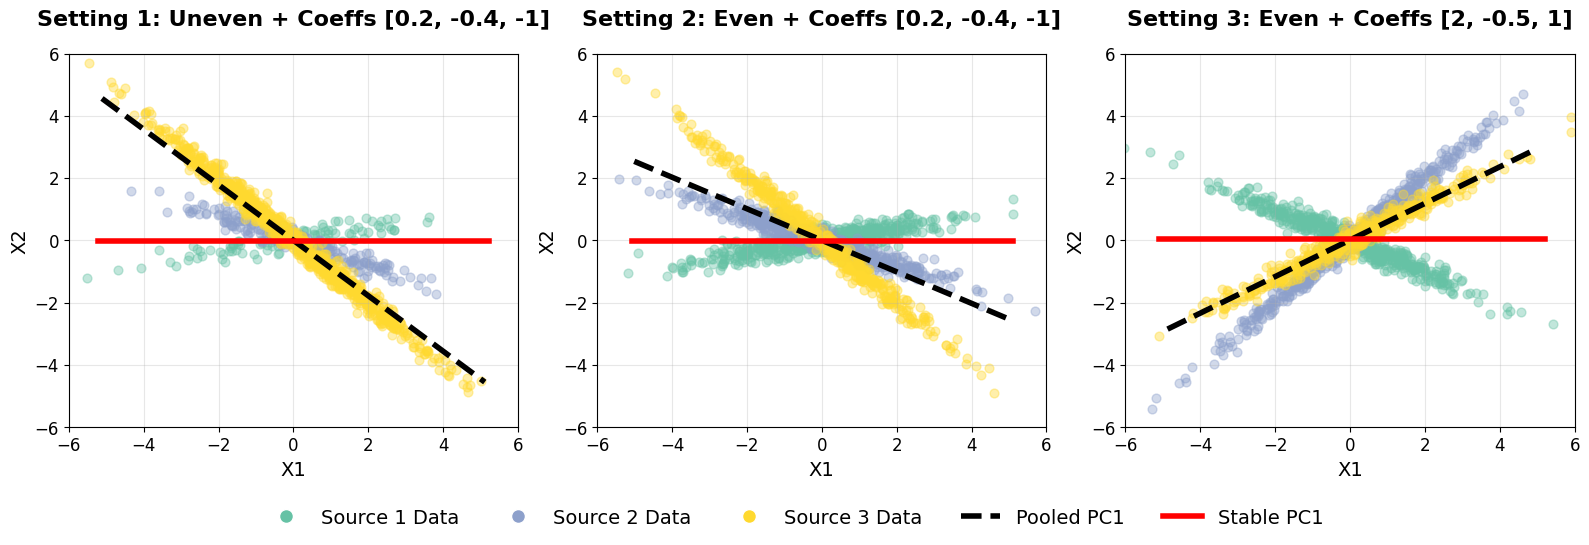

In [7]:
# Set random seed for reproducibility
np.random.seed(20)

# Set global font sizes
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Create figure with two subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 5))
plt.subplots_adjust(bottom=0.25)

# Color setup
set2_colors = ListedColormap(plt.cm.Set2.colors)
source_colors = [set2_colors(0), set2_colors(2), set2_colors(5)]

# =================================================================
# Setting 0: Original coefficients [0.2, -0.4, -1]
# =================================================================
nl_samples = [100, 200, 1000]
coefficients_set0 = [0.2, -0.4, -1]

# Generate data for Setting 0
sources_set0 = []
for l, coef in enumerate(coefficients_set0):
    X1 = np.random.normal(0, np.sqrt(3), nl_samples[l])
    X2 = coef * X1 + np.random.normal(0, 0.2, nl_samples[l])
    sources_set0.append(np.column_stack((X1, X2)))

# Perform analyses for Setting 0
pca_combined_set0 = PCA(n_components=2).fit(np.vstack(sources_set0))
pca_stable_set0 = StablePCA(n_components=2)
pca_stable_set0.fit(sources_set0, M_init=None, w_init=None,eta_init=1.0, max_iter=1000, tol=1e-8)

# Plot Setting 0 results (left panel)
for i, src in enumerate(sources_set0):
    ax0.scatter(src[:, 0], src[:, 1], alpha=0.4, color=source_colors[i], 
               s=40, label=f'Source {i+1} Data')

# Plot PCA directions for Setting 0
pca_combined_line_set0 = pca_combined_set0.components_[0] * 3 * np.sqrt(pca_combined_set0.explained_variance_[0])
ax0.plot([pca_combined_set0.mean_[0] - pca_combined_line_set0[0], 
          pca_combined_set0.mean_[0] + pca_combined_line_set0[0]],
         [pca_combined_set0.mean_[1] - pca_combined_line_set0[1], 
          pca_combined_set0.mean_[1] + pca_combined_line_set0[1]],
         color='black', linewidth=4, linestyle='--', label='Pooled PC1')

pca_stable_line_set0 = pca_stable_set0.components_[0] * 3 * np.sqrt(pca_stable_set0.explained_variance_[0])
ax0.plot([pca_stable_set0.mean_[0] - pca_stable_line_set0[0], 
          pca_stable_set0.mean_[0] + pca_stable_line_set0[0]],
         [pca_stable_set0.mean_[1] - pca_stable_line_set0[1], 
          pca_stable_set0.mean_[1] + pca_stable_line_set0[1]],
         color='red', linewidth=4, label='Stable PC1')

ax0.set_xlabel('X1', fontsize=14)
ax0.set_ylabel('X2', fontsize=14)
ax0.set_title('Setting 1: Uneven + Coeffs [0.2, -0.4, -1]', fontsize=16, pad=20, weight='bold')
ax0.grid(True, alpha=0.3)
ax0.set_xlim(-6, 6)
ax0.set_ylim(-6, 6)

# =================================================================
# Setting 1: Original coefficients [0.2, -0.4, -1]
# =================================================================
n_samples = 500
coefficients_set1 = [0.2, -0.4, -1]

# Generate data for Setting 1
sources_set1 = []
for coef in coefficients_set1:
    X1 = np.random.normal(0, np.sqrt(3), n_samples)
    X2 = coef * X1 + np.random.normal(0, 0.2, n_samples)
    sources_set1.append(np.column_stack((X1, X2)))

# Perform analyses for Setting 1
pca_combined_set1 = PCA(n_components=2).fit(np.vstack(sources_set1))
pca_stable_set1 = StablePCA(n_components=2)
pca_stable_set1.fit(sources_set1, M_init=None, w_init=None,eta_init=1.0, max_iter=1000, tol=1e-8)

# Plot Setting 1 results (left panel)
for i, src in enumerate(sources_set1):
    ax1.scatter(src[:, 0], src[:, 1], alpha=0.4, color=source_colors[i], 
               s=40, label=f'Source {i+1} Data')

# Plot PCA directions for Setting 1
pca_combined_line_set1 = pca_combined_set1.components_[0] * 3 * np.sqrt(pca_combined_set1.explained_variance_[0])
ax1.plot([pca_combined_set1.mean_[0] - pca_combined_line_set1[0], 
          pca_combined_set1.mean_[0] + pca_combined_line_set1[0]],
         [pca_combined_set1.mean_[1] - pca_combined_line_set1[1], 
          pca_combined_set1.mean_[1] + pca_combined_line_set1[1]],
         color='black', linewidth=4, linestyle='--', label='Pooled PC1')

pca_stable_line_set1 = pca_stable_set1.components_[0] * 3 * np.sqrt(pca_stable_set1.explained_variance_[0])
ax1.plot([pca_stable_set1.mean_[0] - pca_stable_line_set1[0], 
          pca_stable_set1.mean_[0] + pca_stable_line_set1[0]],
         [pca_stable_set1.mean_[1] - pca_stable_line_set1[1], 
          pca_stable_set1.mean_[1] + pca_stable_line_set1[1]],
         color='red', linewidth=4, label='Stable PC1')

ax1.set_xlabel('X1', fontsize=14)
ax1.set_ylabel('X2', fontsize=14)
ax1.set_title('Setting 2: Even + Coeffs [0.2, -0.4, -1]', fontsize=16, pad=20, weight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)

# =================================================================
# Setting 2: New coefficients [2, -0.5, 1]
# =================================================================
coefficients_set2 = [-0.5, 1, 0.6]

# Generate data for Setting 2
sources_set2 = []
for coef in coefficients_set2:
    X1 = np.random.normal(0, np.sqrt(3), n_samples)
    X2 = coef * X1 + np.random.normal(0, 0.2, n_samples)
    sources_set2.append(np.column_stack((X1, X2)))

# Perform analyses for Setting 2
pca_combined_set2 = PCA(n_components=2).fit(np.vstack(sources_set2))
pca_stable_set2 = StablePCA(n_components=2)
pca_stable_set2.fit(sources_set2, M_init=None, w_init=None,eta_init=1.0, max_iter=1000, tol=1e-8)

# Plot Setting 2 results (right panel)
for i, src in enumerate(sources_set2):
    ax2.scatter(src[:, 0], src[:, 1], alpha=0.4, color=source_colors[i], 
               s=40, label=f'Source {i+1} Data')

# Plot PCA directions for Setting 2
pca_combined_line_set2 = pca_combined_set2.components_[0] * 3 * np.sqrt(pca_combined_set2.explained_variance_[0])
ax2.plot([pca_combined_set2.mean_[0] - pca_combined_line_set2[0], 
          pca_combined_set2.mean_[0] + pca_combined_line_set2[0]],
         [pca_combined_set2.mean_[1] - pca_combined_line_set2[1], 
          pca_combined_set2.mean_[1] + pca_combined_line_set2[1]],
         color='black', linewidth=4, linestyle='--', label='Pooled PC1')

pca_stable_line_set2 = pca_stable_set2.components_[0] * 3 * np.sqrt(pca_stable_set2.explained_variance_[0])
ax2.plot([pca_stable_set2.mean_[0] - pca_stable_line_set2[0], 
          pca_stable_set2.mean_[0] + pca_stable_line_set2[0]],
         [pca_stable_set2.mean_[1] - pca_stable_line_set2[1], 
          pca_stable_set2.mean_[1] + pca_stable_line_set2[1]],
         color='red', linewidth=4, label='Stable PC1')

ax2.set_xlabel('X1', fontsize=14)
ax2.set_ylabel('X2', fontsize=14)
ax2.set_title('Setting 3: Even + Coeffs [2, -0.5, 1]', fontsize=16, pad=20, weight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)

# =================================================================
# Create a simplified shared legend
# =================================================================
# Create proxy artists for legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Source 1 Data',
           markerfacecolor=source_colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Source 2 Data',
           markerfacecolor=source_colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Source 3 Data',
           markerfacecolor=source_colors[2], markersize=10),
    Line2D([0], [0], color='black', linestyle='--', lw=4, label='Pooled PC1'),
    Line2D([0], [0], color='red', lw=4, label='Stable PC1')
]

fig.legend(handles=legend_elements, loc='lower center', 
           bbox_to_anchor=(0.5, -0.1), ncol=5,
           frameon=False, fontsize=14)

plt.tight_layout()
plt.savefig('three_settings_comparison.png', bbox_inches='tight', dpi=300)
plt.show()